# Linear Algebra, Part 1

## Scalars, Vectors, Matrices and Tensors


In [34]:
import torch

g = torch.manual_seed(42)


In [37]:
# Scalars
x_scalar = torch.rand(1, generator=g).item()
x_scalar

0.8822692632675171

In [8]:
type(x)

float

In [9]:
# Vectors
x = torch.rand(3)

In [10]:
x

tensor([0.7474, 0.8834, 0.7019])

In [11]:
x.shape, x.size()

(torch.Size([3]), torch.Size([3]))

In [12]:
# Matrices
x = torch.rand(2, 3)
x

tensor([[0.1325, 0.4290, 0.1340],
        [0.0142, 0.6329, 0.5747]])

Let's try to further visualize the matrix

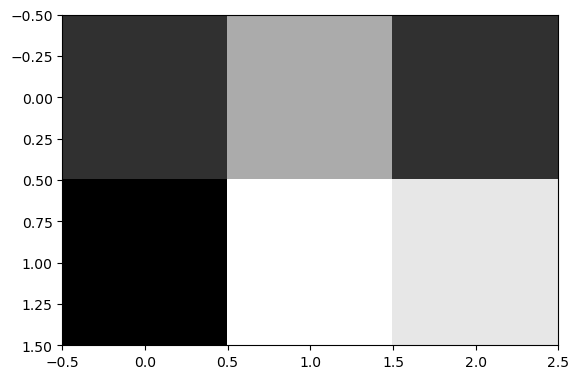

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x, cmap='gray')

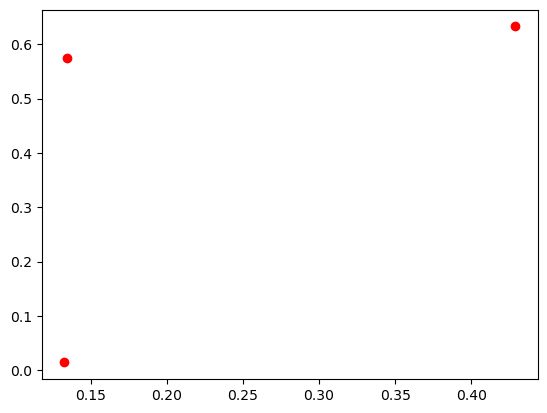

In [20]:
# We can also use x to represent the coordinates of 3 points in 2-dimensional space,
plt.plot(x[0], x[1], 'ro')

In [23]:
x

tensor([[0.1325, 0.4290, 0.1340],
        [0.0142, 0.6329, 0.5747]])

C:\Users\User\AppData\Local\Temp\ipykernel_23536\1700565496.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(x[:,0], x[:,1], x[:,2], c=x, cmap='Blues', s=100);


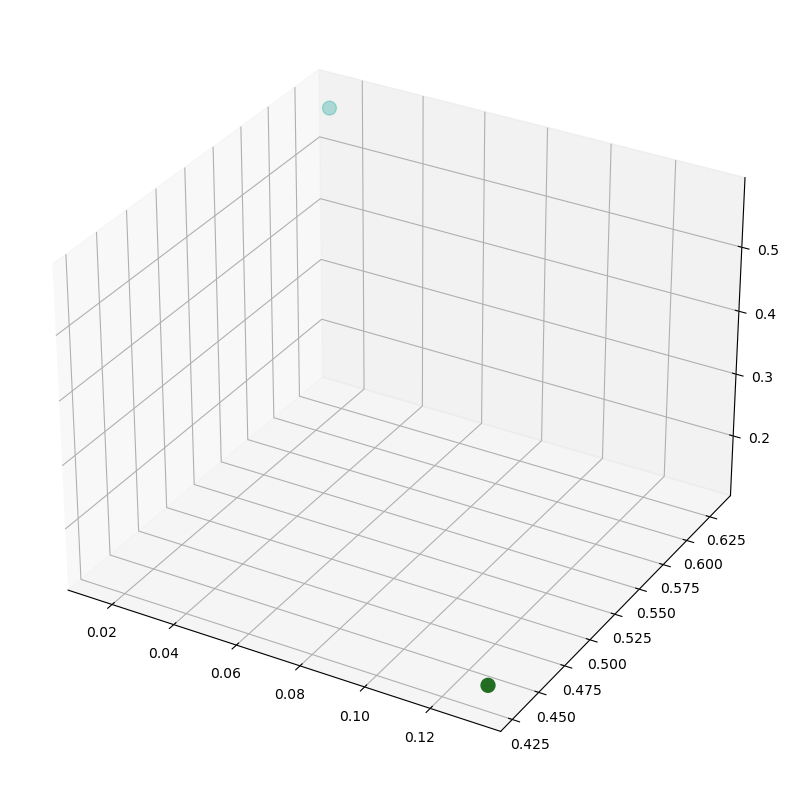

In [38]:
# OR the coordinates of 2 points in 3-dimensional space,
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d');
ax.scatter3D(x[:,0], x[:,1], x[:,2], c=x, cmap='Blues', s=100);


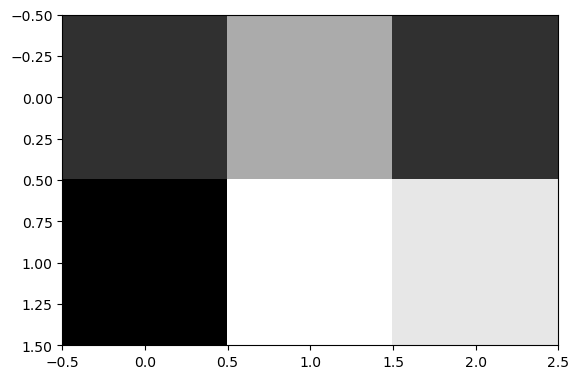

In [18]:
# OR the color values of a 2 x 3 image.
plt.imshow(x, cmap='gray')

Taking a step back, the point I am trying to make here is that these are very **flexible** and very **abstract** structures, and **we can use them to represent many different things**, so long as we make sure that a given representation satisfies all of the rules that all representations must adhere to (another point we will hopefully be able to explore much more deeply after we have developed the whole story far enough).

We can even use them to represent other more complex structures such as graphs and trees, and in fact there is a deep relationship between these structures and the way in which they are actually stored most efficiently on the  hardware, which is something we will explore in a later post, hopefully.

One of the most important types of objects that matrices can be used to represent are Transformations, in particular Linear Transformations, which will be one of the primary focuses of this post.

## Linear Transformations


We are starting to lose focus, so let's return now to the task at hand, starting with the rules that all representations must adhere to.

First, we must define what a representation is.

# Representation Theory

## Rules for Manipulating Representations

### Addition

In [39]:
x = torch.rand(2, 3)
y = torch.rand(2, 3)
x, y

(tensor([[0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566]]),
 tensor([[0.7936, 0.9408, 0.1332],
         [0.9346, 0.5936, 0.8694]]))

In [40]:
x + y

tensor([[1.7086, 1.3236, 1.0925],
        [1.3250, 1.1945, 1.1260]])


The first rule is that we can only add two representations together if they have the same shape. This is because addition is defined as the operation that takes two representations of the same shape and produces a new representation of the same shape, where each element of the new representation is the sum of the corresponding elements of the two original representations.

For example, notice the error we get when we try to add two representations of different shapes.

In [41]:
x = torch.rand(2, 3)
y = torch.rand(2, 2)
x, y

(tensor([[0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666]]),
 tensor([[0.6274, 0.2696],
         [0.4414, 0.2969]]))

In [42]:
x + y

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

We can get a quick mental process to check for this rule by comparing the length of the inner dimensions of the operation:


In [43]:
x = torch.rand(2, 3)
x.shape

torch.Size([2, 3])

In [44]:
y = torch.rand(2, 3)

In [45]:
y.shape

torch.Size([2, 3])



### Multiplication
